In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anaemia-prediction-dataset/expanded_output.csv
/kaggle/input/anaemia-prediction-dataset/file_.csv
/kaggle/input/anaemia-prediction-dataset/d_output.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/kaggle/input/anaemia-prediction-dataset/d_output.csv')

In [4]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes
...,...,...,...,...,...,...,...
495,496,F,45.749211,27.630846,26.865636,13.760084,No
496,497,F,44.929398,30.271085,24.501944,11.588917,No
497,498,F,43.452565,29.784122,26.764283,12.460060,No
498,499,F,43.224231,29.742489,26.866944,12.074058,No


In [5]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [7]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,45.030260,29.392138,25.576149,10.938374
std,144.481833,2.777042,1.585042,1.917043,2.767554
min,1.000000,38.626133,25.023080,19.495306,4.000000
25%,125.750000,43.199936,28.311988,24.877544,9.061067
50%,250.500000,44.906648,29.534431,25.982361,10.018786
75%,375.250000,46.357891,30.582852,26.754657,13.092756
max,500.000000,54.776064,32.526455,29.956341,16.508313


In [8]:
df['Sex'] = df['Sex'].str.strip()

In [9]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

<Axes: xlabel='Sex', ylabel='count'>

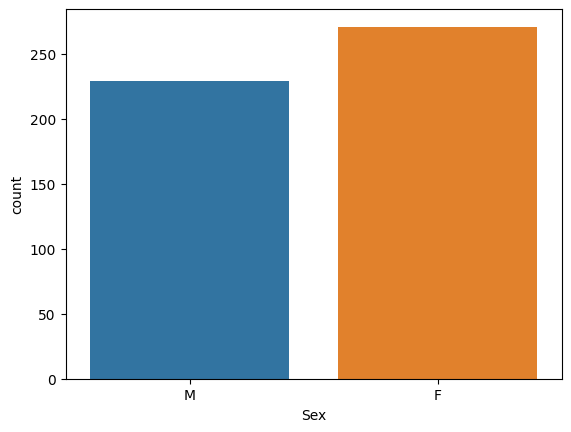

In [10]:
sns.countplot(x='Sex',data=df)

In [11]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [12]:
df.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_M
0,1,43.170845,30.945626,25.921971,6.252659,Yes,True
1,2,43.163481,30.306974,26.759843,8.578865,Yes,False
2,3,46.269997,27.315656,26.028556,9.640936,Yes,False
3,4,45.054787,30.469816,24.460797,4.794217,Yes,False
4,5,45.061884,31.218572,24.071714,8.865329,Yes,True


In [13]:
df['Sex_M']=df['Sex_M'].astype(int)


In [14]:
mapping = {'Yes': 1, 'No': 0}

In [15]:
df['Anaemic'] = df['Anaemic'].replace(mapping)

/tmp/ipykernel_18/4061680374.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anaemic'] = df['Anaemic'].replace(mapping)


In [16]:
df.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_M
0,1,43.170845,30.945626,25.921971,6.252659,1,1
1,2,43.163481,30.306974,26.759843,8.578865,1,0
2,3,46.269997,27.315656,26.028556,9.640936,1,0
3,4,45.054787,30.469816,24.460797,4.794217,1,0
4,5,45.061884,31.218572,24.071714,8.865329,1,1


In [17]:
crr=df.corr()

<Axes: >

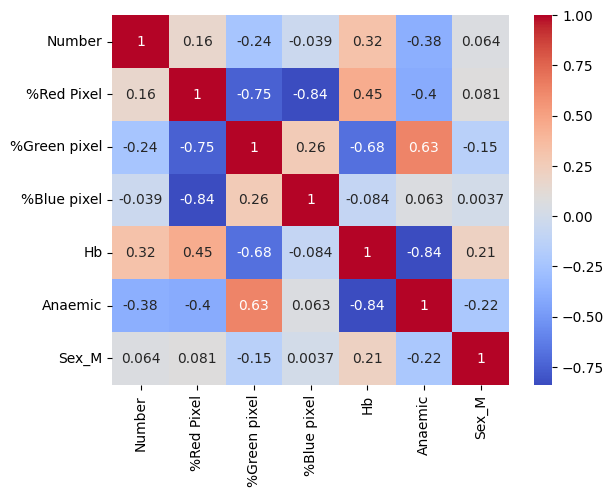

In [18]:
sns.heatmap(crr,cmap='coolwarm',annot=True)

<Axes: xlabel='%Red Pixel', ylabel='count'>

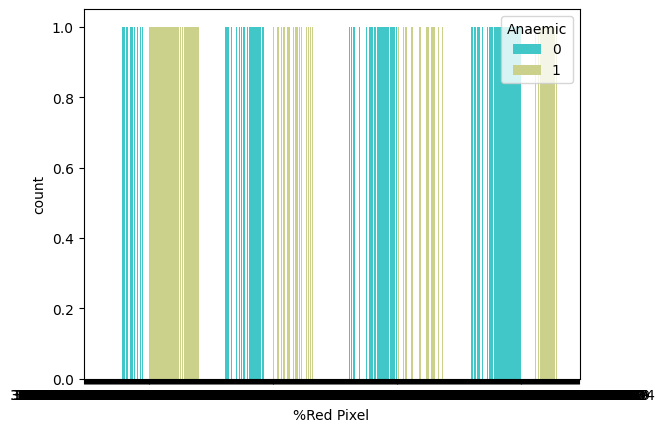

In [19]:
sns.countplot(x='%Red Pixel',data=df,hue='Anaemic',palette='rainbow')

<Axes: xlabel='Anaemic', ylabel='count'>

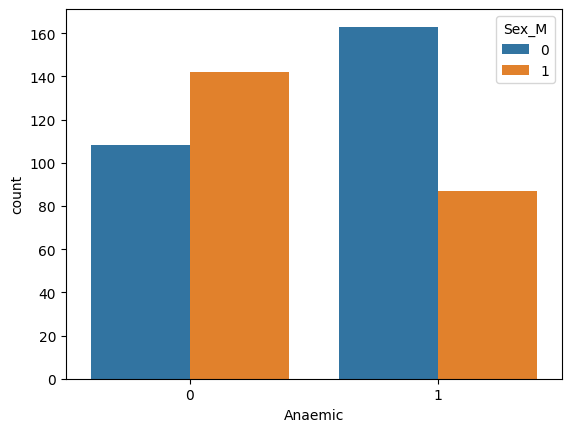

In [20]:
sns.countplot(x='Anaemic',data=df,hue='Sex_M')

# Linear Regression

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop('Anaemic',axis=1)
y=df['Anaemic']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

## Training Model

In [24]:
from sklearn.linear_model import LogisticRegression 

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression()

## Prediction & Evaluation

In [27]:
prediction_lr=lr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,prediction_lr))
print(confusion_matrix(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[63  1]
 [ 0 86]]


# KNN

## Standization of Variables

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale=StandardScaler()


In [32]:
scale.fit(df.drop('Anaemic',axis=1))

StandardScaler()

In [33]:
scaled_values=scale.transform(df.drop('Anaemic',axis=1))

In [34]:
scaled_values

array([[-1.72859016, -0.67023701,  0.98107405,  0.18057403, -1.69478481,
         1.08784471],
       [-1.72166195, -0.67289161,  0.57774605,  0.61807649, -0.85341505,
        -0.91924885],
       [-1.71473373,  0.44687082, -1.3113605 ,  0.23622818, -0.46927244,
        -0.91924885],
       ...,
       [ 1.71473373, -0.5686896 ,  0.2475494 ,  0.62039483,  0.55038143,
        -0.91924885],
       [ 1.72166195, -0.65099394,  0.22125696,  0.67400045,  0.41076777,
        -0.91924885],
       [ 1.72859016,  0.83752748, -1.79225178, -0.03899856,  1.54403462,
        -0.91924885]])

In [35]:
scaled_df=pd.DataFrame(scaled_values,columns=df.columns[:-1])

## Train Test Split

In [36]:
X=scaled_df
y=df['Anaemic']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

## Model Training

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Prediction & Evaluation

In [41]:
prediction_knn=knn.predict(X_test)

In [42]:
print(classification_report(y_test,prediction_knn))
print(confusion_matrix(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.97      1.00      0.98        86

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

[[61  3]
 [ 0 86]]


## Choosing K-Value

In [43]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    error_rate.append(np.mean(y_test!=prediction_knn))


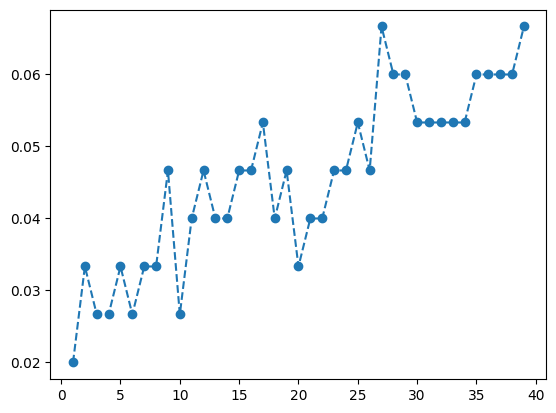

In [44]:
plt.plot(range(1,40),error_rate,ls='--',marker='o')

## here the Graph plot also shows that 1 is best value for K for good accuracy.

# Decision Trees & Random Forest

## Train Test Split

In [45]:
X=df.drop('Anaemic',axis=1)
y=df['Anaemic']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

## Training Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree=DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction & Evaluation

In [49]:
prediction_dtree=dtree.predict(X_test)

In [50]:
print(classification_report(y_test,prediction_knn))
print(confusion_matrix(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        64
           1       0.90      1.00      0.95        86

    accuracy                           0.93       150
   macro avg       0.95      0.92      0.93       150
weighted avg       0.94      0.93      0.93       150

[[54 10]
 [ 0 86]]


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
R=RandomForestClassifier()

In [53]:
R.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
prediction_R=R.predict(X_test)

In [55]:
print(classification_report(y_test,prediction_R))
print(confusion_matrix(y_test,prediction_R))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        86

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[64  0]
 [ 0 86]]


# Support Vector Machine

## Train Test Split

In [56]:
X=df.drop('Anaemic',axis=1)
y=df['Anaemic']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

## Training Model

In [57]:
from sklearn.svm import SVC

In [58]:
svc=SVC()

In [59]:
svc.fit(X_train,y_train)

SVC()

## Prediction and Evaluation

In [60]:
prediction_svc=svc.predict(X_test)

In [61]:
print(classification_report(y_test,prediction_R))
print(confusion_matrix(y_test,prediction_R))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        86

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[64  0]
 [ 0 86]]


## Grid Search CV

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [64]:
grid=GridSearchCV(SVC(),param_grid,verbose=3,refit=True)

In [65]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [66]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [67]:
grid.best_estimator_

SVC(C=1, gamma=0.01)

In [68]:
prediction_grid=grid.predict(X_test)

In [69]:
print(classification_report(y_test,prediction_grid))
print(confusion_matrix(y_test,prediction_grid))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.99      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[64  0]
 [ 1 85]]
